# Import

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import json
import os
from tensorflow.keras import layers, models

# Read CSV

In [4]:
# Specify the path to the CSV file
file_path = 'house_price_jabodetabek_dataset.csv'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Print the Dataframe
df

,District,City,Latitude,Longitude,Price,Land_Size_M2,Building_Size_M2,Floors,Bedrooms,Bathrooms,Carport/Garage
0,Babelan,Bekasi,-6.227721,107.001649,3.450000e+08,60.0,40.0,1.0,2.0,1.0,1.0
1,Pondokmelati,Bekasi,-6.296441,106.921566,1.265000e+09,90.0,110.0,2.0,3.0,3.0,2.0
2,Bekasi Utara,Bekasi,-6.211765,107.003851,1.300000e+09,80.0,120.0,2.0,3.0,3.0,2.0
3,Cikarang Pusat,Bekasi,-6.365165,107.182391,1.090000e+09,98.0,102.0,2.0,4.0,2.0,2.0
4,Mustikajaya,Bekasi,-6.303947,107.026896,8.000000e+08,96.0,75.0,1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
10198,Pantai Mutiara,Jakarta Utara,-6.107730,106.791458,1.850000e+10,583.0,1300.0,1.0,5.0,6.0,1.0
10199,Kemang,Jakarta Selatan,-6.277783,106.811422,5.400000e+09,156.0,262.0,4.0,4.0,3.0,2.0
10200,Daan Mogot,Jakarta Barat,-6.170157,106.762833,1.700000e+09,90.0,120.0,2.0,2.0,2.0,1.0
10201,Semanan,Jakarta Barat,-6.164927,106.705773,2.800000e+09,120.0,136.0,2.0,3.0,3.0,2.0


In [5]:
df.describe()

,Latitude,Longitude,Price,Land_Size_M2,Building_Size_M2,Floors,Bedrooms,Bathrooms,Carport/Garage
count,10203.000000,10203.000000,1.020300e+04,10203.000000,10203.000000,10203.000000,10203.000000,10203.000000,10203.000000
mean,-6.294118,106.816283,5.401933e+09,180.638048,183.625012,1.743017,3.325296,2.523179,1.277271
std,0.144496,1.064945,2.995057e+10,300.937700,228.340618,0.720100,1.989320,1.873558,1.258439
min,-7.390627,0.009928,1.000000e+00,20.000000,21.000000,1.000000,1.000000,1.000000,0.000000
25%,-6.382268,106.753181,6.500000e+08,68.000000,60.000000,1.000000,2.000000,1.000000,1.000000
50%,-6.269703,106.818170,1.400000e+09,94.000000,100.000000,2.000000,3.000000,2.000000,1.000000
75%,-6.186628,106.904982,3.750000e+09,180.000000,210.000000,2.000000,4.000000,3.000000,2.000000
max,0.007496,107.579996,1.800000e+12,9632.000000,4461.000000,14.000000,56.000000,56.000000,15.000000


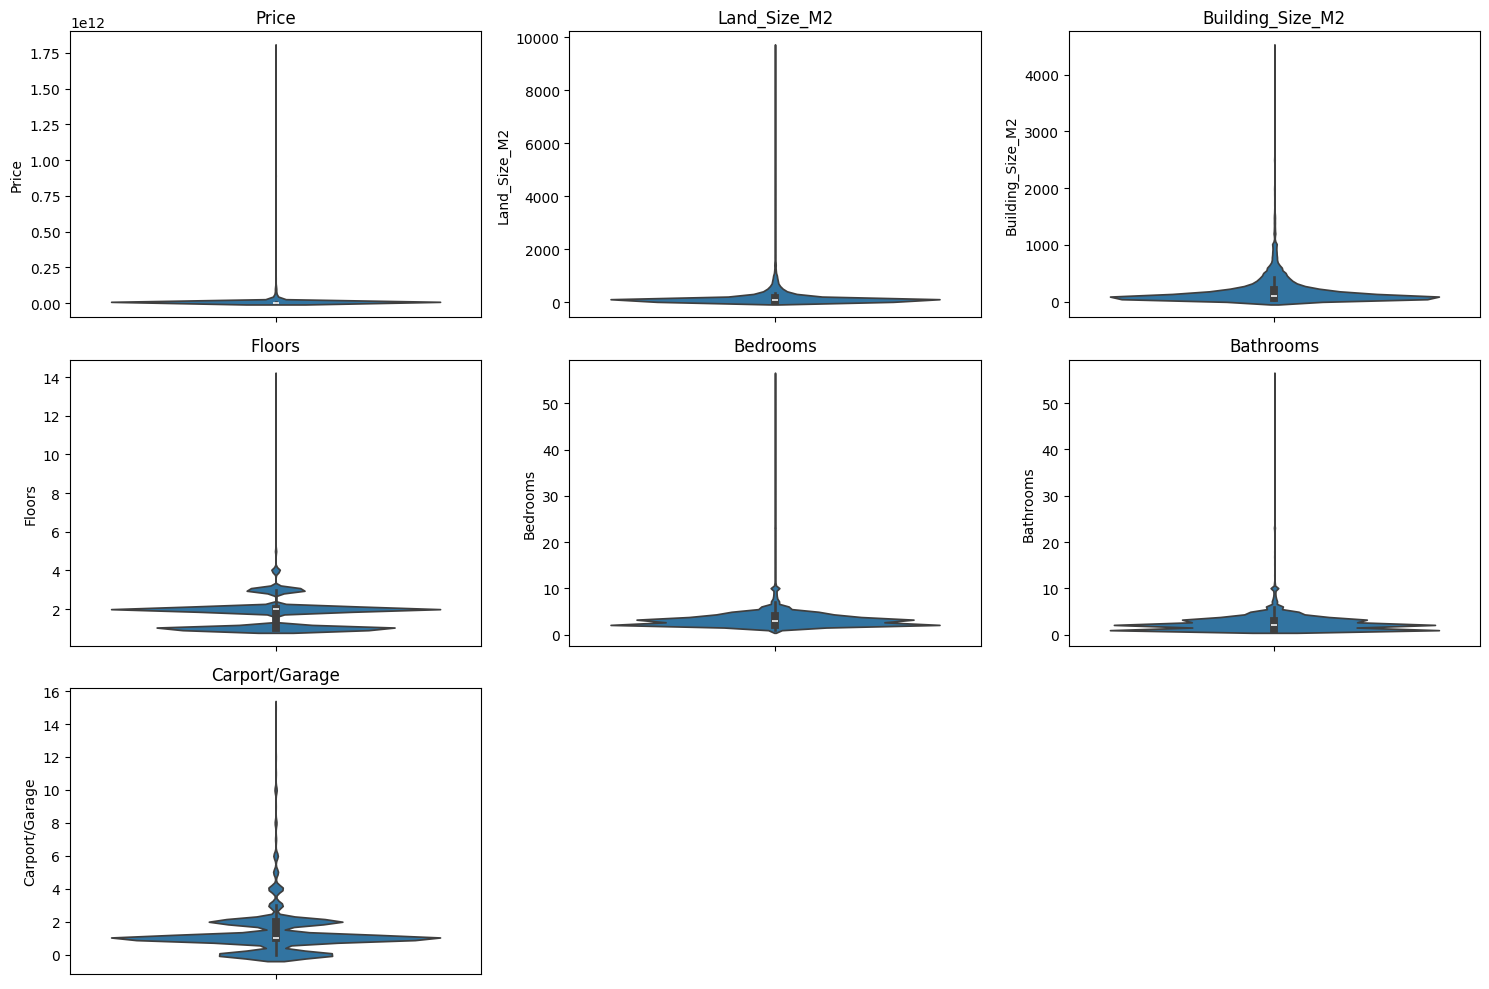

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

float_columns = ['Price', 'Land_Size_M2', 'Building_Size_M2', 'Floors', 'Bedrooms', 'Bathrooms', 'Carport/Garage']

plt.figure(figsize=(15, 10))
for i, column in enumerate(float_columns):
    plt.subplot(3, 3, i+1)
    sns.violinplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

### Outlier check

In [7]:
float_columns = ['Price', 'Land_Size_M2', 'Building_Size_M2', 'Floors', 'Bedrooms', 'Bathrooms', 'Carport/Garage']

def count_outliers_and_clean(df, columns):
    outlier_counts = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = outliers.shape[0]
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return outlier_counts, df.reset_index(drop=True)

outlier_counts, df_cleaned = count_outliers_and_clean(df, float_columns)

for column, count in outlier_counts.items():
    print(f'{column}: {count} outliers')

print("Cleaned DataFrame:")
df_cleaned.info()

Price: 1233 outliers
Land_Size_M2: 723 outliers
Building_Size_M2: 380 outliers
Floors: 52 outliers
Bedrooms: 366 outliers
Bathrooms: 330 outliers
Carport/Garage: 2339 outliers
Cleaned DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4780 entries, 0 to 4779
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   District          4780 non-null   object 
 1   City              4780 non-null   object 
 2   Latitude          4780 non-null   float64
 3   Longitude         4780 non-null   float64
 4   Price             4780 non-null   float64
 5   Land_Size_M2      4780 non-null   float64
 6   Building_Size_M2  4780 non-null   float64
 7   Floors            4780 non-null   float64
 8   Bedrooms          4780 non-null   float64
 9   Bathrooms         4780 non-null   float64
 10  Carport/Garage    4780 non-null   float64
dtypes: float64(9), object(2)
memory usage: 410.9+ KB


# Encoding

## Encoding District

Ini encoding berdasarkan median harga dari district tersebut

In [8]:
# Step 1: Calculate the median of "price_in_rp" for each district
district_medians = df_cleaned.groupby('District')['Price'].median()

# Step 2: Sort the categories by their median "price_in_rp" in descending order
sorted_categories_district = district_medians.sort_values(ascending=False).index

# Step 3: Create a dictionary for encoding based on sorted order
encoding_district_dict = {district: idx for idx, district in enumerate(sorted_categories_district, start=1)}

# Print the encoding dictionary
print("Encoding Dictionary:", encoding_district_dict)

# Create a folder named "encoding" if it doesn't exist
encoding_folder = '.'
if not os.path.exists(encoding_folder):
    os.makedirs(encoding_folder)

# Export the encoding to a JSON file in the "encoding" folder
json_file_path = os.path.join(encoding_folder, 'encoding_district_dict.json')
with open(json_file_path, 'w') as json_file:
    json.dump(encoding_district_dict, json_file, indent=4)

print(f"Dictionary has been exported to {json_file_path}")

# Step 4: Encode the "district" column using the encoding dictionary
df_cleaned['District'] = df_cleaned['District'].map(encoding_district_dict)

df_cleaned

Encoding Dictionary: {'Jembatan Lima': 1, 'Lebak Bulus': 2, 'Pondok Indah': 3, 'Mampang Prapatan': 4, 'Golf Island': 5, 'Gambir': 6, 'Gandaria': 7, 'Ulujami': 8, 'Fatmawati': 9, 'Puri Mansion': 10, 'Bangka': 11, 'Permata Buana': 12, 'Taman Grisenda': 13, 'Tanah Abang': 14, 'Green Mansion': 15, 'Puri Indah': 16, 'Puri Media': 17, 'Joglo': 18, 'Kav Dki': 19, 'Teluk Gong': 20, 'Green Ville': 21, 'Petukangan': 22, 'Sunter': 23, 'Rawamangun': 24, 'Pantai Indah Kapuk': 25, 'Muara Karang': 26, 'Pulomas': 27, 'Tebet': 28, 'Palmerah': 29, 'Pejaten': 30, 'Metland Puri': 31, 'Penjaringan': 32, 'Mangga Besar': 33, 'Pulo Gadung': 34, 'Pluit': 35, 'Duren Tiga': 36, 'Legenda Wisata': 37, 'Kebon Jeruk': 38, 'Cipinang Melayu': 39, 'Kebagusan': 40, 'Bukit Duri': 41, 'Kelapa Gading': 42, 'Tomang': 43, 'Kalideres': 44, 'Tanjung Duren': 45, 'Grogol Petamburan': 46, 'Taman Surya': 47, 'Pancoran': 48, 'Daan Mogot': 49, 'Kebayoran Baru': 50, 'Pagedangan': 51, 'Bintaro': 52, 'Pantai Indah Kapuk 2': 53, 'Pasar 

,District,City,Latitude,Longitude,Price,Land_Size_M2,Building_Size_M2,Floors,Bedrooms,Bathrooms,Carport/Garage
0,217,Bekasi,-6.227721,107.001649,3.450000e+08,60.0,40.0,1.0,2.0,1.0,1.0
1,190,Bekasi,-6.303947,107.026896,8.000000e+08,96.0,75.0,1.0,3.0,1.0,1.0
2,174,Bekasi,-6.277895,106.991831,8.600000e+08,84.0,99.0,2.0,3.0,3.0,1.0
3,188,Bekasi,-6.211765,107.003851,9.850000e+08,135.0,135.0,1.0,3.0,2.0,1.0
4,190,Bekasi,-6.321760,106.998164,5.500000e+08,52.0,108.0,2.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4775,112,Jakarta Pusat,-6.195352,106.849818,1.990000e+09,59.0,85.0,2.0,3.0,3.0,1.0
4776,94,Jakarta Selatan,-6.268990,106.806000,1.500000e+09,105.0,75.0,1.0,3.0,1.0,1.0
4777,83,Jakarta Pusat,-6.181280,106.875350,2.960000e+09,61.0,90.0,2.0,3.0,3.0,1.0
4778,109,Jakarta Timur,-6.209890,106.898720,2.350000e+09,44.0,68.0,2.0,3.0,3.0,1.0


# Encoding City

Ini encoding berdasarkan median harga dari city tersebut

In [9]:
# Step 1: Calculate the median of "price_in_rp" for each city
city_medians = df_cleaned.groupby('City')['Price'].median()

# Step 2: Sort the categories by their median "price_in_rp" in descending order
sorted_categories_city = city_medians.sort_values(ascending=False).index

# Step 3: Create a dictionary for encoding based on sorted order
encoding_city_dict = {city: idx for idx, city in enumerate(sorted_categories_city, start=1)}

# Print the encoding dictionary
print("Encoding Dictionary:", encoding_city_dict)

# Export the encoding to a JSON file in the "encoding" folder
json_file_path = os.path.join(encoding_folder, 'encoding_city_dict.json')
with open(json_file_path, 'w') as json_file:
    json.dump(encoding_city_dict, json_file, indent=4)

print(f"Dictionary has been exported to {json_file_path}")

# Step 4: Encode the "city" column using the encoding dictionary
df_cleaned['City'] = df_cleaned['City'].map(encoding_city_dict)

df_cleaned

Encoding Dictionary: {'Jakarta Utara': 1, 'Jakarta Barat': 2, 'Jakarta Selatan': 3, 'Jakarta Timur': 4, 'Jakarta Pusat': 5, 'Tangerang': 6, 'Depok': 7, 'Bekasi': 8, 'Bogor': 9}
Dictionary has been exported to ./encoding_city_dict.json


,District,City,Latitude,Longitude,Price,Land_Size_M2,Building_Size_M2,Floors,Bedrooms,Bathrooms,Carport/Garage
0,217,8,-6.227721,107.001649,3.450000e+08,60.0,40.0,1.0,2.0,1.0,1.0
1,190,8,-6.303947,107.026896,8.000000e+08,96.0,75.0,1.0,3.0,1.0,1.0
2,174,8,-6.277895,106.991831,8.600000e+08,84.0,99.0,2.0,3.0,3.0,1.0
3,188,8,-6.211765,107.003851,9.850000e+08,135.0,135.0,1.0,3.0,2.0,1.0
4,190,8,-6.321760,106.998164,5.500000e+08,52.0,108.0,2.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4775,112,5,-6.195352,106.849818,1.990000e+09,59.0,85.0,2.0,3.0,3.0,1.0
4776,94,3,-6.268990,106.806000,1.500000e+09,105.0,75.0,1.0,3.0,1.0,1.0
4777,83,5,-6.181280,106.875350,2.960000e+09,61.0,90.0,2.0,3.0,3.0,1.0
4778,109,4,-6.209890,106.898720,2.350000e+09,44.0,68.0,2.0,3.0,3.0,1.0


# Normalization

Using the max-min normalization

In [10]:
# Compute maximum and minimum values for each column
max_values = df_cleaned.max()
min_values = df_cleaned.min()

# Construct dictionary with maximum and minimum values for each column
result_dict = {}
for column in df_cleaned.columns:
  if(column == "Price"):
    continue
  result_dict[f"{column}_max"] = max_values[column]
  result_dict[f"{column}_min"] = min_values[column]

# Specify the file path where you want to save the JSON
json_file_path = os.path.join(encoding_folder, 'max_min_values.json')

# Write the dictionary to a JSON file
with open(json_file_path, 'w') as json_file:
  json.dump(result_dict, json_file, indent=4)

print(f"Dictionary has been exported to {json_file_path}")

Dictionary has been exported to ./max_min_values.json


In [11]:
# Function to normalize a column using min-max scaling
def min_max_normalize(column):
    min_val = column.min()
    max_val = column.max()
    normalized_column = 0
    if (max_val - min_val) == 0:
      normalized_column = 0
    else:
      normalized_column = (column - min_val) / (max_val - min_val)

    return normalized_column

# Apply normalization to all columns except "price_in_rp"
normalized_columns = df_cleaned.drop(columns=['Price']).apply(min_max_normalize)

# Add the "price_in_rp" column back to the normalized DataFrame
df_cleaned = pd.concat([normalized_columns, df_cleaned['Price']], axis=1)

df_cleaned

,District,City,Latitude,Longitude,Land_Size_M2,Building_Size_M2,Floors,Bedrooms,Bathrooms,Carport/Garage,Price
0,0.853755,0.875,0.708913,0.735547,0.181818,0.075697,0.0,0.333333,0.0,0,3.450000e+08
1,0.747036,0.875,0.598166,0.766398,0.345455,0.215139,0.0,0.666667,0.0,0,8.000000e+08
2,0.683794,0.875,0.636016,0.723549,0.290909,0.310757,0.5,0.666667,1.0,0,8.600000e+08
3,0.739130,0.875,0.732094,0.738237,0.522727,0.454183,0.0,0.666667,0.5,0,9.850000e+08
4,0.747036,0.875,0.572286,0.731288,0.145455,0.346614,0.5,0.333333,0.5,0,5.500000e+08
...,...,...,...,...,...,...,...,...,...,...,...
4775,0.438735,0.500,0.755941,0.550010,0.177273,0.254980,0.5,0.666667,1.0,0,1.990000e+09
4776,0.367589,0.250,0.648954,0.496464,0.386364,0.215139,0.0,0.666667,0.0,0,1.500000e+09
4777,0.324111,0.500,0.776386,0.581209,0.186364,0.274900,0.5,0.666667,1.0,0,2.960000e+09
4778,0.426877,0.375,0.734819,0.609767,0.109091,0.187251,0.5,0.666667,1.0,0,2.350000e+09


In [12]:
from sklearn.preprocessing import  MinMaxScaler

X = df_cleaned.drop(columns=['Price'])
y = df_cleaned['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler =  MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_regressor(predictions, y_test):
    # Mean Absolute Error
    mae = mean_absolute_error(y_test, predictions)
    print(f"Mean Absolute Error (MAE): {mae:.4f}")

    # Mean Squared Error
    mse = mean_squared_error(y_test, predictions)
    print(f"Mean Squared Error (MSE): {mse:.4f}")

    # Root Mean Squared Error
    rmse = np.sqrt(mse)
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

    # R-squared
    r2 = r2_score(y_test, predictions)
    print(f"R-squared (R2): {r2:.4f}")


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.01),
              loss='mse', metrics=['mse'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100, batch_size=10,
                    verbose=1,
                    callbacks=[early_stopping])


Epoch 1/100
383/383 [==============================] - 6s 5ms/step - loss: 1698703820911017984.0000 - mse: 1698703820911017984.0000 - val_loss: 2012411530745741312.0000 - val_mse: 2012411530745741312.0000
Epoch 2/100
383/383 [==============================] - 1s 3ms/step - loss: 1689987992237637632.0000 - mse: 1689988129676591104.0000 - val_loss: 1993732889774129152.0000 - val_mse: 1993732889774129152.0000
Epoch 3/100
383/383 [==============================] - 1s 3ms/step - loss: 1659537842340102144.0000 - mse: 1659537842340102144.0000 - val_loss: 1946249518055948288.0000 - val_mse: 1946249518055948288.0000
Epoch 4/100
383/383 [==============================] - 1s 4ms/step - loss: 1600282961695997952.0000 - mse: 1600282961695997952.0000 - val_loss: 1867146528385138688.0000 - val_mse: 1867146528385138688.0000
Epoch 5/100
383/383 [==============================] - 1s 3ms/step - loss: 1512541384043659264.0000 - mse: 1512541384043659264.0000 - val_loss: 1757391078677282816.0000 - val_mse: 

In [15]:
def plot_history(history):
    # Menyimpan history
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    # Plotting loss
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

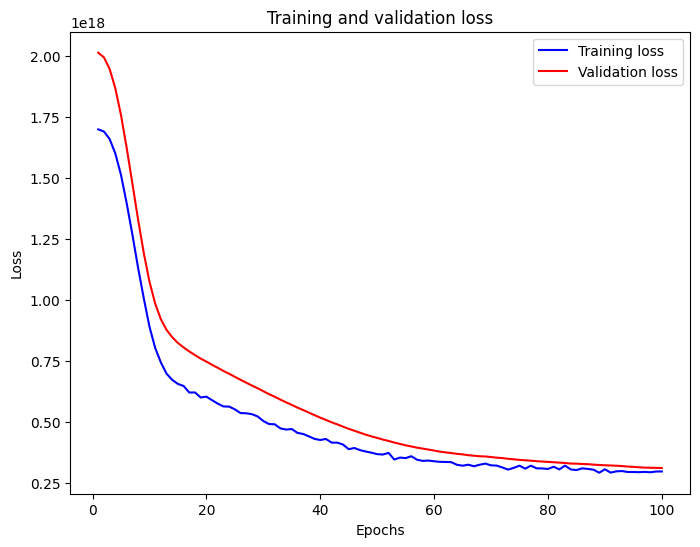

In [16]:
plot_history(history)

In [17]:
# Using the functions to predict and evaluate the model
y_pred = model.predict(X_test)
evaluate_regressor(y_pred, y_test)

30/30 [==============================] - 0s 2ms/step
Mean Absolute Error (MAE): 335603375.0115
Mean Squared Error (MSE): 312557566794612992.0000
Root Mean Squared Error (RMSE): 559068481.3103
R-squared (R2): 0.6695


# Data Split

In [ ]:
# from sklearn.model_selection import StratifiedShuffleSplit

# # Initialize the StratifiedShuffleSplit
# strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# # Split the DataFrame
# for train_index, test_index in strat_split.split(df, df['City']):
#     train_df = df.iloc[train_index]
#     test_df = df.iloc[test_index]

from sklearn.model_selection import train_test_split

# Initialize empty DataFrames for train and test
train_df = pd.DataFrame()
test_df = pd.DataFrame()

# Iterate over each unique city
for city in df['City'].unique():
    # Filter the DataFrame for the current city
    city_df = df[df['City'] == city]

    # Perform the train-test split for the current city
    city_train, city_test = train_test_split(city_df, test_size=0.2, random_state=42)

    # Append the split data to the respective DataFrames
    train_df = pd.concat([train_df, city_train])
    test_df = pd.concat([test_df, city_test])


unique_values_counts = df['City'].value_counts()
print("\nAll set unique value counts\n", unique_values_counts)
unique_values_counts = train_df['City'].value_counts()
print("\nTrain set unique value counts\n", unique_values_counts)
unique_values_counts = test_df['City'].value_counts()
print("\nTest set unique value counts\n", unique_values_counts)

In [ ]:
train_df

In [ ]:
test_df

In [ ]:
X_train = train_df.drop(['Price'],axis=1)
y_train = train_df['Price']
y_train = y_train/1000000000

In [ ]:
X_test = test_df.drop(['Price'],axis=1)
y_test = test_df['Price']
y_test = y_test/1000000000

# Machine Learning

In [ ]:
%pip install tensorflow tensorflow_decision_forests

In [ ]:
from sklearn.metrics import r2_score

# Define the input shape
input_shape = X_train.shape[1:]

# Define the model architecture with increased complexity
model = models.Sequential([
    layers.Dense(1024, activation="relu", input_shape=input_shape),
    layers.Dense(1024, activation="relu"),
    layers.Dense(1024, activation="relu"),
    layers.Dense(1)
])

# Compile the model with a lower learning rate
optimizer = tf.keras.optimizers.Adam()  # Adjust learning rate
model.compile(optimizer=optimizer, loss='mse', metrics=[tf.keras.metrics.R2Score()])

# Train the model with more epochs
history = model.fit(X_train, y_train, epochs=10000, verbose=1, validation_data=(X_test,y_test))

# Calculate R-squared (R2) score
y_train_pred = model.predict(X_train)
train_r2_score = r2_score(y_train, y_train_pred)

print("Training R2 score:", train_r2_score)

In [ ]:
from sklearn.metrics import r2_score
from tensorflow.keras import models, layers, callbacks

# Define the input shape
input_shape = X_train.shape[1:]

# Define the model architecture with enhancements
model = models.Sequential([
    layers.Dense(1024, activation="relu", input_shape=input_shape),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation="relu"),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1)
])

# Compile the model with a learning rate scheduler
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss='mse', metrics=[tf.keras.metrics.MeanSquaredError()])

# Implement early stopping and learning rate scheduler
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train the model with callbacks
history = model.fit(X_train, y_train, epochs=10000, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stopping, lr_scheduler])

# Calculate R-squared (R2) score
y_train_pred = model.predict(X_train)
train_r2_score = r2_score(y_train, y_train_pred)

print("Training R2 score:", train_r2_score)